In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)


In [95]:
import numpy as np

In [105]:
stats= pd.read_csv('data\Stats NBA 2024.csv')
stats.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,0.382,0.573,0.617,33.9,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,0.274,0.623,0.648,30.4,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,0.353,0.567,0.636,30.1,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,0.401,0.543,0.592,28.7,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6


# NBA Fantasy Points Scoring System

- Three Point Field Goals: 3 points   
- Two Point Field Goals: 2 points   
- Free Throws Made: 1 point   
- Rebounds: 1.2 points  
- Assists: 1.5 points  
- Blocked Shots: 2 points  
- Steals: 2 points  
- Turnovers: -1 points  

In [106]:
stats.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

In [107]:
# Definimos el puntaje de fantasy según tus reglas
def calcular_puntos_fantasy(row):
    # Calcular tiros de 3 puntos hechos (3PM) usando los intentos y el porcentaje de 3P%
    three_point_made = row['3PA'] * (row['3P%']) / row['GP']
    
    # Calcular tiros de 2 puntos hechos (2PM) usando los intentos y el porcentaje de 2P%
    two_point_made = row['2PA'] * (row['2P%']) / row['GP']
    
    # Calcular puntos de tiros libres hechos (FTM) usando el porcentaje de FT%
    free_throw_made = row['FTA'] * (row['FT%']) / row['GP']
    
    # Calcular puntaje total basado en las reglas que me diste
    puntos_fantasy = (
        (3 * three_point_made) +  # 3 puntos por tiros de 3
        (2 * two_point_made) +    # 2 puntos por tiros de 2
        (1 * free_throw_made) +   # 1 punto por tiros libres
        (1.2 * row['RPG']) +      # 1.2 puntos por rebotes
        (1.5 * row['APG']) +      # 1.5 puntos por asistencias
        (2 * row['SPG']) +        # 2 puntos por robos
        (2 * row['BPG']) -        # 2 puntos por bloqueos
        (1 * row['TPG'])          # -1 punto por pérdidas de balón
    )
    
    return puntos_fantasy

# Crear una nueva columna en el DataFrame con el puntaje de fantasy calculado
stats['Puntos Fantasy'] = stats.apply(calcular_puntos_fantasy, axis=1)

# Mostrar los primeros resultados
stats.head()


,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Puntos Fantasy
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8,58.283487
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,0.382,0.573,0.617,33.9,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9,59.412571
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,0.274,0.623,0.648,30.4,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9,55.168493
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,0.353,0.567,0.636,30.1,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7,49.569773
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,0.401,0.543,0.592,28.7,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6,42.892610


In [108]:
Price = pd.read_excel("./data/Fantasy.xlsx")
Price.head()

,Player,Team,Precio,Uso,Form,TP,PosFantasy
0,Nikola Jokic,DEN,20.5,0.196,0,4610.4,Front
1,Luka Doncic,DAL,19.0,0.233,0,4303.2,Back
2,Giannis Antetokounmpo,MIL,17.5,0.145,0,4194.4,Front
3,Anthony Davis,LAL,17.0,0.055,0,4076.2,Front
4,Domantas Sabonis,SAC,17.0,0.040,0,4039.5,Front


In [109]:
# Limpiar los nombres de las columnas eliminando espacios en blanco
Price.columns = Price.columns.str.strip()
stats.columns = stats.columns.str.strip()
# Convertir las columnas 'NAME' y 'Player' a minúsculas
stats['NAME'] = stats['NAME'].str.lower().str.strip()
Price['Player'] = Price['Player'].str.lower().str.strip()

In [110]:
merged_df =pd.merge(stats, Price, left_on='NAME', right_on='Player', how='left').reset_index() #.sort_values('DRtg',ascending=True)
merged_df.head()

,index,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Puntos Fantasy,Player,Team,Precio,Uso,Form,TP,PosFantasy
0,0,NaN,joel embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8,58.283487,joel embiid,PHI,18.0,0.051,0.0,2383.5,Front
1,1,NaN,luka doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,0.382,0.573,0.617,33.9,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9,59.412571,luka doncic,DAL,19.0,0.233,0.0,4303.2,Back
2,2,NaN,giannis antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,0.274,0.623,0.648,30.4,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9,55.168493,giannis antetokounmpo,MIL,17.5,0.145,0.0,4194.4,Front
3,3,NaN,shai gilgeous-alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,0.353,0.567,0.636,30.1,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7,49.569773,shai gilgeous-alexander,OKC,17.0,0.138,0.0,3940.0,Back
4,4,NaN,jalen brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,0.401,0.543,0.592,28.7,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6,42.892610,jalen brunson,NYK,15.5,0.102,0.0,3388.1,Back


In [111]:
# Definir las condiciones para clasificar las posiciones
merged_df['PosAgg'] = np.where(
    merged_df['POS'].isin(['F', 'F-G', 'F-C', 'C-F']), 'Front',
    'Back'
)
merged_df.head(1)

,index,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Puntos Fantasy,Player,Team,Precio,Uso,Form,TP,PosFantasy,PosAgg
0,0,NaN,joel embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8,58.283487,joel embiid,PHI,18.0,0.051,0.0,2383.5,Front,Back


In [112]:
merged_df.to_csv('data/stats_price.csv')

# Feature Enginering

In [113]:
merge_data=pd.read_csv('data/stats_price.csv')

In [114]:
merge_data.head()

,Unnamed: 0,index,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Puntos Fantasy,Player,Team,Precio,Uso,Form,TP,PosFantasy,PosAgg
0,0,0,NaN,joel embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8,58.283487,joel embiid,PHI,18.0,0.051,0.0,2383.5,Front,Back
1,1,1,NaN,luka doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,0.382,0.573,0.617,33.9,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9,59.412571,luka doncic,DAL,19.0,0.233,0.0,4303.2,Back,Back
2,2,2,NaN,giannis antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,0.274,0.623,0.648,30.4,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9,55.168493,giannis antetokounmpo,MIL,17.5,0.145,0.0,4194.4,Front,Front
3,3,3,NaN,shai gilgeous-alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,0.353,0.567,0.636,30.1,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7,49.569773,shai gilgeous-alexander,OKC,17.0,0.138,0.0,3940.0,Back,Back
4,4,4,NaN,jalen brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,0.401,0.543,0.592,28.7,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6,42.892610,jalen brunson,NYK,15.5,0.102,0.0,3388.1,Back,Back


In [115]:
df_analysis_v1 = merge_data[['Player', 'PosFantasy','AGE','USG%','TO%','eFG%','VI','ORtg','DRtg','Puntos Fantasy','P+R','P+A','P+R+A']]
df_analysis_v1.head()

,Player,PosFantasy,AGE,USG%,TO%,eFG%,VI,ORtg,DRtg,Puntos Fantasy,P+R,P+A,P+R+A
0,joel embiid,Front,30.1,39.6,15.0,0.561,15.3,124.0,104.8,58.283487,45.7,40.3,51.3
1,luka doncic,Back,25.1,36.0,14.6,0.573,15.5,121.9,109.9,59.412571,43.1,43.7,52.9
2,giannis antetokounmpo,Front,29.4,33.0,15.4,0.623,14.9,125.6,106.9,55.168493,42.0,37.0,48.5
3,shai gilgeous-alexander,Back,25.8,32.9,9.8,0.567,11.9,128.6,107.7,49.569773,35.6,36.3,41.8
4,jalen brunson,Back,27.6,32.5,10.1,0.543,10.0,124.2,112.6,42.892610,32.3,35.5,39.1


In [116]:
df_analysis_v1['PosFantasy'].unique()

array(['Front', 'Back', nan], dtype=object)

In [117]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


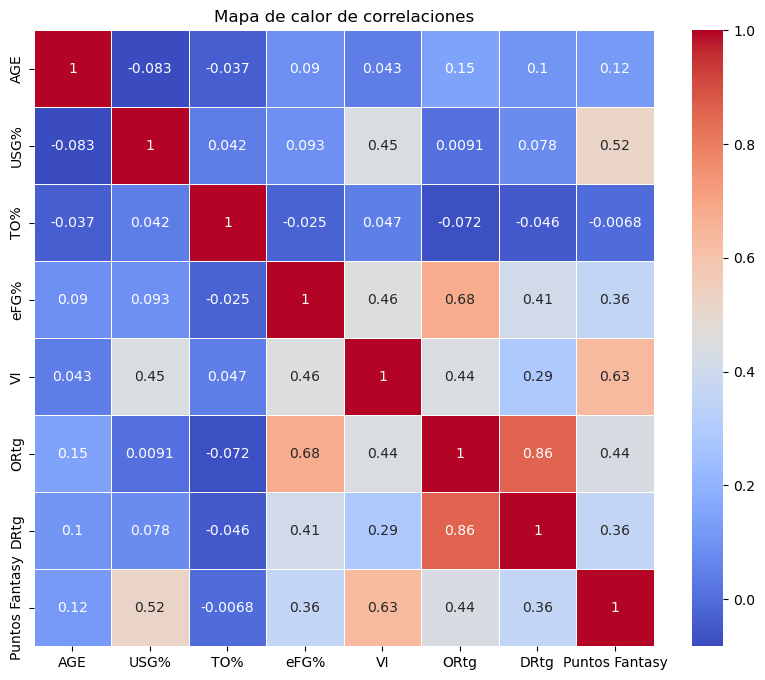

In [118]:

# 1. Correlación entre variables numéricas y "Puntos Fantasy"
# Seleccionar solo las columnas numéricas
numerical_columns = ['AGE', 'USG%', 'TO%', 'eFG%', 'VI', 'ORtg', 'DRtg', 'Puntos Fantasy']
correlation_matrix = df_analysis_v1[numerical_columns].corr()

# Visualizar el mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


## NBA PLAYER STATS GLOSSARY
- -USG%: Usage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor
- TO%: A metric that estimates the number of turnovers a player commits per 100 possessions
- eFG%: With eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA
- TS%: True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws
- PPG: Points per game
- RPG: Rebounds per game
- APG: Assists per game
- SPG: Steals per game
- BPG: Blocks per game
- TOPG: Turnovers per game
- P+R: Player Props = (Points + Rebounds) total per game
- P+A: Player Props = (Points + Assists) total per game
- P+R+A: Player Props = (Points + Rebounds + Assists) total per game
- VI: The versatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds
- ORTG: Individual offensive rating estimates the number of points produced (including assists) by a player per 100 offensive possessions
- DRTG: Individual defensive rating estimates the number of points allowed (including blocks, steals) by a player per 100 defensive possessions

Resultado del ANOVA para POS y Puntos Fantasy:
F-statistic: 22.00, p-value: 0.0000
Hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.


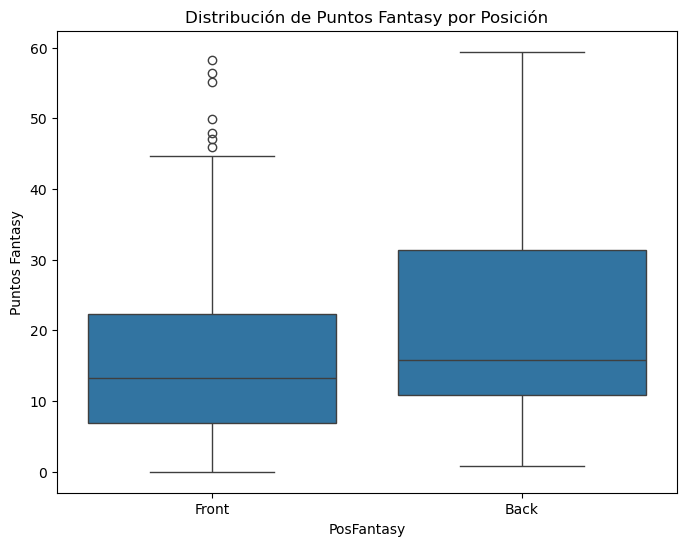

In [119]:

# 2. ANOVA para la variable categórica "POS" y "Puntos Fantasy"
# Comprobamos si las posiciones tienen un efecto significativo en "Puntos Fantasy"
anova_result = stats.f_oneway(
    df_analysis_v1.loc[df_analysis_v1['PosFantasy'] == 'Back', 'Puntos Fantasy'],
    df_analysis_v1.loc[df_analysis_v1['PosFantasy'] == 'Front', 'Puntos Fantasy'],
)

# Mostrar el resultado del ANOVA
print("Resultado del ANOVA para POS y Puntos Fantasy:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

# Interpretación del resultado del ANOVA
if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.")
else:
    print("No hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.")

# Gráfico boxplot para visualizar la distribución de Puntos Fantasy por posición
plt.figure(figsize=(8, 6))
sns.boxplot(x='PosFantasy', y='Puntos Fantasy', data=df_analysis_v1)
plt.title("Distribución de Puntos Fantasy por Posición")
plt.show()


Resultado del ANOVA para POS y Puntos Fantasy:
F-statistic: 22.79, p-value: 0.0000
Hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.


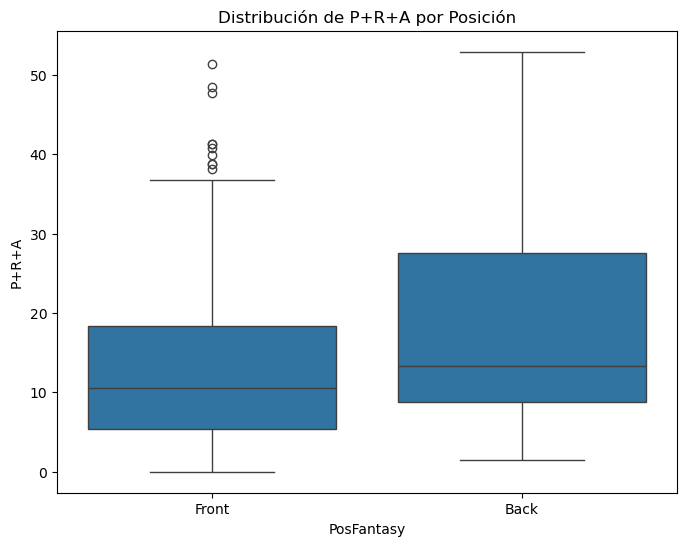

In [120]:
# 3. ANOVA para la variable categórica "POS" y "P+R+A" (P+R	P+A	P+R+A	)
# Comprobamos si las posiciones tienen un efecto significativo en "Puntos Fantasy"
var ='P+R+A'
anova_result = stats.f_oneway(
    df_analysis_v1.loc[df_analysis_v1['PosFantasy'] == 'Back', f'{var}'],
    df_analysis_v1.loc[df_analysis_v1['PosFantasy'] == 'Front', f'{var}'])

# Mostrar el resultado del ANOVA
print("Resultado del ANOVA para POS y Puntos Fantasy:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

# Interpretación del resultado del ANOVA
if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.")
else:
    print("No hay diferencias significativas en Puntos Fantasy entre las diferentes posiciones.")

# Gráfico boxplot para visualizar la distribución de Puntos Fantasy por posición
plt.figure(figsize=(8, 6))
sns.boxplot(x='PosFantasy', y=f'{var}', data=df_analysis_v1)
plt.title(f"Distribución de {var} por Posición")
plt.show()


# Modelado

In [121]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Modelos de regression

# 1:

In [50]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [126]:
data= df_analysis_v1.copy().dropna().drop_duplicates(subset=['Player'])
# 1. Preparación de los datos
# Variables independientes (X) y dependiente (y)
X = data[['PosFantasy', 'AGE', 'USG%', 'TO%', 'eFG%', 'VI', 'ORtg', 'DRtg']]
y = data['Puntos Fantasy']

# Aplicar One-Hot Encoding para la variable categórica "POS"
X = pd.get_dummies(X, columns=['PosFantasy'], drop_first=True).astype(int)

# Añadir una constante para el término independiente en el modelo
X = sm.add_constant(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:

# 2. Ajustar el modelo de regresión lineal usando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Obtener el resumen del modelo
print(model.summary())

# 3. Interpretación del resumen
# Coeficientes y p-valores de cada característica
coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'P-Value': model.pvalues
})


# Interpretar los p-valores
significant_features = coef_df[coef_df['P-Value'] < 0.05]
if not significant_features.empty:
    print("\nCaracterísticas significativas (p-valor < 0.05):")
    print(significant_features)
else:
    print("\nNo hay características significativas con p-valor < 0.05.")


                            OLS Regression Results                            
Dep. Variable:         Puntos Fantasy   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     87.05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.96e-79
Time:                        12:34:38   Log-Likelihood:                -1550.9
No. Observations:                 452   AIC:                             3118.
Df Residuals:                     444   BIC:                             3151.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -24.8802      3.067  

# 2

In [128]:
data= df_analysis_v1.copy().dropna().drop_duplicates(subset=['Player'])

# 1. Preparación de los datos
# Variables independientes (X) y dependiente (y)
X = data[['PosFantasy', 'AGE', 'USG%', 'eFG%', 'VI', 'ORtg', 'DRtg']]
y = data['Puntos Fantasy']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear transformaciones para las variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['AGE', 'USG%', 'eFG%', 'VI', 'ORtg', 'DRtg']),
        ('cat', OneHotEncoder(drop='first'), ['PosFantasy'])  # One-Hot Encoding para POS, omitiendo la primera categoría
    ])


In [129]:

# 2. Modelos de regresión
data= df_analysis_v1.copy()

# a) Regresión lineal múltiple
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

linear_pipeline.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_linear = linear_pipeline.predict(X_test)
print("R-cuadrado (Regresión Lineal):", r2_score(y_test, y_pred_linear))
print("MSE (Regresión Lineal):", mean_squared_error(y_test, y_pred_linear))

# Coeficientes de la regresión lineal
coef = linear_pipeline.named_steps['regressor'].coef_
features = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
print("Coeficientes de la regresión lineal:")
print(coef_df)

# b) Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_pipeline.predict(X_test)
print("R-cuadrado (Random Forest):", r2_score(y_test, y_pred_rf))
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))

# Importancia de las características en Random Forest
rf_importances = rf_pipeline.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
print("Importancia de las características (Random Forest):")
print(importance_df.sort_values(by='Importance', ascending=False))


R-cuadrado (Regresión Lineal): 0.5284080500494954
MSE (Regresión Lineal): 62.868648429673065
Coeficientes de la regresión lineal:
                 Feature  Coefficient
0               num__AGE     1.507160
1              num__USG%     4.800640
2              num__eFG%    -0.230907
3                num__VI     3.672635
4              num__ORtg     3.836650
5              num__DRtg    -0.241388
6  cat__PosFantasy_Front    -2.289361
R-cuadrado (Random Forest): 0.6001426959519032
MSE (Random Forest): 53.3055924149576
Importancia de las características (Random Forest):
                 Feature  Importance
3                num__VI    0.300771
1              num__USG%    0.298230
4              num__ORtg    0.218514
5              num__DRtg    0.062979
2              num__eFG%    0.061200
0               num__AGE    0.052913
6  cat__PosFantasy_Front    0.005393


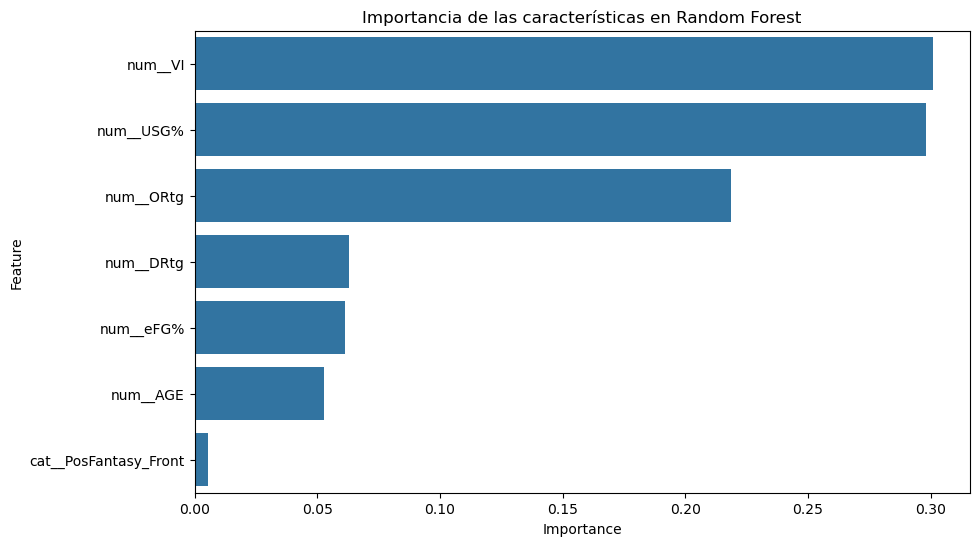

In [130]:

# 3. Visualizar la importancia de las características en Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title("Importancia de las características en Random Forest")
plt.show()


In [131]:
merge_data.columns

Index(['Unnamed: 0', 'index', 'RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP',
       'MPG', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%',
       'TS%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A',
       'VI', 'ORtg', 'DRtg', 'Puntos Fantasy', 'Player', 'Team', 'Precio',
       'Uso', 'Form', 'TP', 'PosFantasy', 'PosAgg'],
      dtype='object')

# Exportar datos analizados

In [132]:
merge_data.columns

Index(['Unnamed: 0', 'index', 'RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP',
       'MPG', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%',
       'TS%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A',
       'VI', 'ORtg', 'DRtg', 'Puntos Fantasy', 'Player', 'Team', 'Precio',
       'Uso', 'Form', 'TP', 'PosFantasy', 'PosAgg'],
      dtype='object')

In [133]:
merge_data[['Player','PosFantasy','Precio','VI','USG%','ORtg','DRtg','eFG%','AGE','Puntos Fantasy']].to_csv('data/optimizar.csv')